# EE0005 Group Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math
sb.set()


    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


In [2]:
heartdata = pd.read_csv('cardio_train.csv')
heartdata.head(n = 10000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,14249,20427,1,166,65.0,130,80,1,1,0,0,0,0
9996,14251,18214,1,160,93.0,140,80,2,1,0,0,1,1
9997,14252,14665,1,158,66.0,130,90,2,2,0,0,1,0
9998,14253,18328,1,168,70.0,160,80,3,1,0,0,1,1


In [3]:
heartdata.shape

(70000, 13)

In [4]:
heartdata.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
heartdata['years'] = (heartdata['age']/365).round().astype('int')
years = pd.DataFrame(heartdata['years'])
years.head()

,years
0,50
1,55
2,52
3,48
4,48


In [6]:
height = pd.DataFrame(heartdata['height'])
height.head()

,height
0,168
1,156
2,165
3,169
4,156


In [7]:
weight = pd.DataFrame(heartdata['weight'])
weight.head()

,weight
0,62.0
1,85.0
2,64.0
3,82.0
4,56.0


In [8]:
heartdata['bmi'] = heartdata['weight'] / (heartdata['height']/100)**2
bmi = pd.DataFrame(heartdata['bmi'])
bmi.head()

,bmi
0,21.967120
1,34.927679
2,23.507805
3,28.710479
4,23.011177


MAP is Mean Arterial Pressure

In [9]:
heartdata['MAP'] = ((2 * heartdata['ap_lo'] + heartdata['ap_hi'])/3)
MAP = pd.DataFrame(heartdata['MAP'])
MAP.head()

,MAP
0,90.000000
1,106.666667
2,90.000000
3,116.666667
4,73.333333


In [10]:
newheartdata = heartdata.drop(columns = ['id', 'age'])

In [11]:
newheartdata.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi,MAP
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,90.000000
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,106.666667
2,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805,90.000000
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,116.666667
4,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177,73.333333


Data Visualisation

By Age

In [13]:
print("Ages: ", len(newheartdata["years"].unique()))

Ages:  28


In [14]:
yearsdf = pd.DataFrame(newheartdata['years'].value_counts())
yearsdf.head()

,years
56,6031
54,5988
58,5702
60,5465
52,5303


In [15]:
cardiodf = pd.DataFrame(newheartdata['cardio'])
cardiodf.head()

,cardio
0,0
1,1
2,1
3,1
4,0


<AxesSubplot:xlabel='years', ylabel='count'>

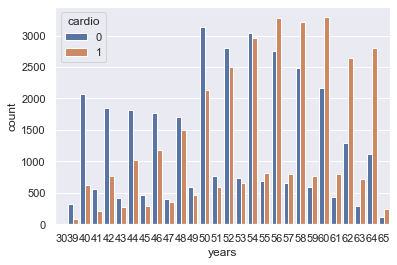

In [16]:
sb.countplot(x = 'years', hue = 'cardio', data = newheartdata)

In [17]:
yearDF = pd.concat([years, cardiodf], axis = 1). reindex(years.index)
yearDF

,years,cardio
0,50,0
1,55,1
2,52,1
3,48,1
4,48,0
...,...,...
69995,53,0
69996,62,1
69997,52,1
69998,61,1


In [18]:
yearDF.corr()

,years,cardio
years,1.000000,0.237749
cardio,0.237749,1.000000


By Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

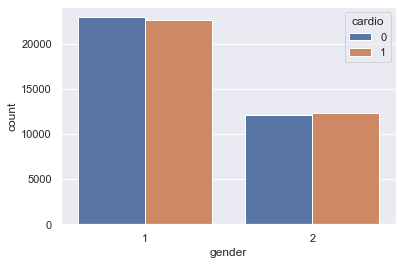

In [19]:
sb.countplot(x = 'gender', hue = 'cardio', data = newheartdata)

Gender: 1 is Male, 2 is Female

Count: 1 is Have disease, 2 is Do not have disease

In [20]:
genderdf = pd.DataFrame(newheartdata['gender'])
genderdf.head()

,gender
0,2
1,1
2,1
3,2
4,1


In [ ]:
genderDF = pd.concat([genderdf, cardiodf], axis = 1). reindex(genderdf.index)
genderDF

In [ ]:
genderDF.corr()

For int64 data

In [ ]:
intdata = pd.DataFrame(newdf[['bmi', 'years', 'height', 'weight', 
                              'ap_hi', 'ap_lo', 'cardio']])
intdata.head()

In [ ]:
intdata.corr()

In [ ]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(intdata.corr(), vmin = -1, vmax = 2, annot = True, fmt = '.2f')

For categorical data

In [ ]:
catdata = pd.DataFrame(newdf[['gender', 'cholesterol','gluc', 
                              'smoke', 'alco', 'active', 'cardio']])
catdata.head()

In [ ]:
catdata.corr()

In [ ]:
f = plt.figure(figsize = (12, 12))
sb.heatmap(catdata.corr(), vmin = -1, vmax = 2, annot = True, fmt = '.2f')